In [56]:
import scipy.stats as st
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

import tqdm 
import tqdm.notebook
import scipy 
import pandas as pd
# temp: functions and more...
from utils import *
from optimization import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Effect of $\beta$

For a fixed $\lambda$ and different initializations of the selected cities, how does the value of value of $\beta$ affects the minimum value acheived for the objective function?

In [92]:
def effect_of_beta(n_iter, l, cities, beta_range, num_runs):
    # dictionary to save the results
    results = {beta: [] for beta in beta_range}
    l = 0.8
    for beta in beta_range:
        np.random.seed(2)
        for i in range(num_runs):
            _, loss_values = optimize(cities, l, beta=beta, 
                                          n_iter=n_iter,mutation_strategy=0,
                                          precompute_pairwise_dist=False, verbose=False)
            # save the result
            results[beta].append(loss_values[-1])
    return results

In [90]:
N = 100
num_iter = 5000
num_runs = 10
l = 0.8
beta_range = [5, 10, 25, 50, 100, 1000]
g = G1(N)
r_G1 = effect_of_beta(num_iter, l, g, beta_range, num_runs)

g = G2(N)
r_G2 = effect_of_beta(num_iter, l, g, beta_range, num_runs)

/home/ahmad/MCAA_project_ADH/optimization.py:63: RuntimeWarning: overflow encountered in exp
  a_ik = min(1, np.exp(-beta * (new_loss_value - current_loss_value)))


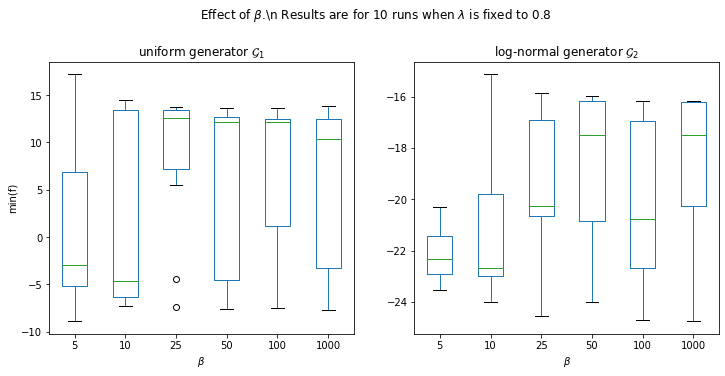

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df = pd.DataFrame(r_G1)
fig.text(0.3, 1, r"Effect of $\beta$.\n Results are for {} runs when $\lambda$ is fixed to {}".format(num_runs, l), fontsize=12)
df.plot(ax = ax[0], kind="box", title= r"uniform generator $\mathcal{G}_1$")
df = pd.DataFrame(r_G2)
df.plot(ax = ax[1], kind="box", title= r"log-normal generator $\mathcal{G}_2$")
ax[1].set_xlabel(r"$\beta$")
ax[0].set_xlabel(r"$\beta$")
ax[0].set_ylabel("min(f)");

### How do the values $\mathbb{E}_{\mathcal{G}} [|\mathcal{S}^{\ast}(\lambda)|]$ and $\mathbb{E}_{\mathcal{G}} [f(\lambda, \mathcal{S}^{\ast}(\lambda))]$ evolve with respect to $\lambda$?

For now we fix $\beta = 10$, to run this experiment.

In [94]:
def effect_of_lambda(n_iter, beta, generator, N, lambda_range, num_runs):
    # dictionary to save the results
    results_f = {l: [] for l in lambda_range}
    results_num_cities = {l: [] for l in lambda_range}
    for i in range(num_runs):
        cities = generator(N)
        for l in lambda_range:
            all_selected_cities, loss_values = optimize(cities, l, beta=beta, 
                                          n_iter=n_iter,mutation_strategy=0,
                                          precompute_pairwise_dist=False, verbose=False)
            # save the result
            results_f[l].append(loss_values[-1])
            results_num_cities[l].append(sum(all_selected_cities[-1]))
    return results_num_cities, results_f

In [64]:
lambda_range = [0, 0.2, 0.4, 0.6, 0.8, 1]
r_num_cities, r_f = effect_of_lambda(5000, 10, 100, lambda_range, 10)

In [96]:
N = 100
num_iter = 5000
num_runs = 10
beta = 10
lambda_range = [0, 0.2, 0.4, 0.6, 0.8, 1]

r_G1_num_cities, r_G1_f =  effect_of_lambda(num_iter, beta, G1, N, lambda_range, num_runs)

r_G2_num_cities, r_G2_f =  effect_of_lambda(num_iter, beta, G2, N, lambda_range, num_runs)

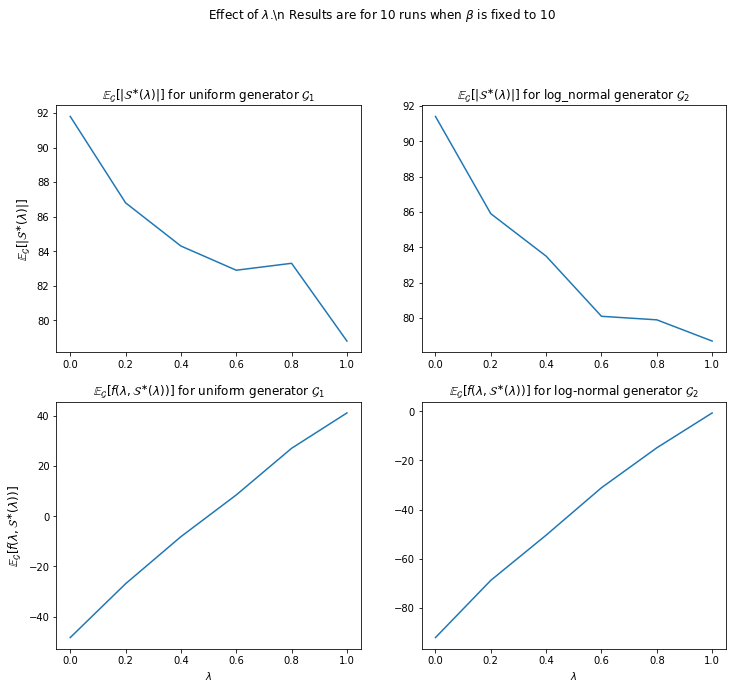

In [102]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

fig.text(0.3, 1, r"Effect of $\lambda$.\n Results are for {} runs when $\beta$ is fixed to {}".format(num_runs, beta), fontsize=12)
ax[0][0].plot(lambda_range, [np.mean(i) for i in r_G1_num_cities.values()])
ax[0][0].set_title(r"$\mathbb{E}_{\mathcal{G}} [|\mathcal{S}^{\ast}(\lambda)|]$ for uniform generator $\mathcal{G}_1$")

ax[0][1].plot(lambda_range, [np.mean(i) for i in r_G2_num_cities.values()])
ax[0][1].set_title(r"$\mathbb{E}_{\mathcal{G}} [|\mathcal{S}^{\ast}(\lambda)|]$ for log_normal generator $\mathcal{G}_2$")

ax[1][0].plot(lambda_range, [np.mean(i) for i in r_G1_f.values()])
ax[1][0].set_title(r"$\mathbb{E}_{\mathcal{G}} [f(\lambda, \mathcal{S}^{\ast}(\lambda))]$ for uniform generator $\mathcal{G}_1$")

ax[1][1].plot(lambda_range, [np.mean(i) for i in r_G2_f.values()])
ax[1][1].set_title(r"$\mathbb{E}_{\mathcal{G}} [f(\lambda, \mathcal{S}^{\ast}(\lambda))]$ for log-normal generator $\mathcal{G}_2$")

ax[1][0].set_xlabel(r"$\lambda$")
ax[1][1].set_xlabel(r"$\lambda$")
ax[0][0].set_ylabel(r"$\mathbb{E}_{\mathcal{G}} [|\mathcal{S}^{\ast}(\lambda)|]$", fontsize=12)
ax[1][0].set_ylabel(r"$\mathbb{E}_{\mathcal{G}} [f(\lambda, \mathcal{S}^{\ast}(\lambda))]$", fontsize=12);